In [3]:
# Warning 생략
import warnings
warnings.filterwarnings('ignore')
# Pandas
import pandas as pd
# Numpy
import numpy as np
# ML 저장
import joblib
# 그래프
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Seaborn
import seaborn as sns
# Glob
import glob

# ML Data 나누기
from sklearn.model_selection import train_test_split
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# SVM
from sklearn import svm
from sklearn.svm import SVC
# Neural Net
from sklearn.neural_network import MLPClassifier
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier
# 회귀모델
from sklearn.neighbors import KNeighborsRegressor
# 선형회귀
from sklearn.linear_model import LinearRegression
# 다중회귀
from sklearn.preprocessing import PolynomialFeatures
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
# Grid Search
from sklearn.model_selection import GridSearchCV
# Extra Tree
from sklearn.ensemble import ExtraTreesClassifier
# Gradient Boostring
from sklearn.ensemble import GradientBoostingClassifier
# Histogram gradient boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
# XGBoost
from xgboost import XGBClassifier
# Permutation Importance (치환중요도)
from sklearn.inspection import permutation_importance

# 평균 절대값 오차
from sklearn.metrics import mean_absolute_error

from sklearn import datasets

# k-Means Model
from sklearn.cluster import KMeans

# 교차 검증
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
# 표준화
from sklearn.preprocessing import StandardScaler
# Lasso (L1)
from sklearn.linear_model import Lasso
# Ridge (L2)
from sklearn.linear_model import Ridge
# 확률적 경사하강법
from sklearn.linear_model import SGDClassifier

# Cluster
from sklearn.cluster import KMeans
# Voting
from sklearn.ensemble import VotingClassifier
# 정확도 측정
from sklearn.metrics import accuracy_score
# Sigmoid
from scipy.special import expit
# SoftMax
from scipy.special import softmax
# KFold
from sklearn.model_selection import StratifiedKFold

# Image 저장
from PIL import Image

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### k-Means
- 대표적인 군집 알고리즘으로 군집의 중심을 찾는 작업
- 클러스트(cluster) : 군집
- 클러스터링 : 군집화 하는 작업
- 과일 데이터에는 K가 3인 작업으로 K를 hyper parameter

In [4]:
fruits = np.load('../Data/fruits.npy')

In [5]:
# 3차원 데이터를 2차원 데이터로 변경하기
fruits_2d = fruits.reshape(-1, 100 * 100)
fruits_2d.shape

(300, 10000)

In [6]:
# k-Means Model
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [7]:
# 군집화한 Label 출력
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [8]:
# 군집화한 cluster 개수와  확인
np.unique(km.labels_, return_counts=True) # return_counts : unique한 개수를 보여준다.

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))

In [9]:
# Cluster 0이 111개인지 확인
count0 = 0
for i in km.labels_:
    if i == 0:
        count0 += 1

print(count0)

111


In [22]:
def draw_fruits(arr, ratio=1): # ratio : 해상도 크기
    n = len(arr) # n : 샘플의 개수
    # 한줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산
    rows = int(np.ceil(n/10))
    # 행이 1개이며 열 개수는 샘플 개수이고 그렇지 않으면 10개 입니다. 
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10+j < n:
                axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

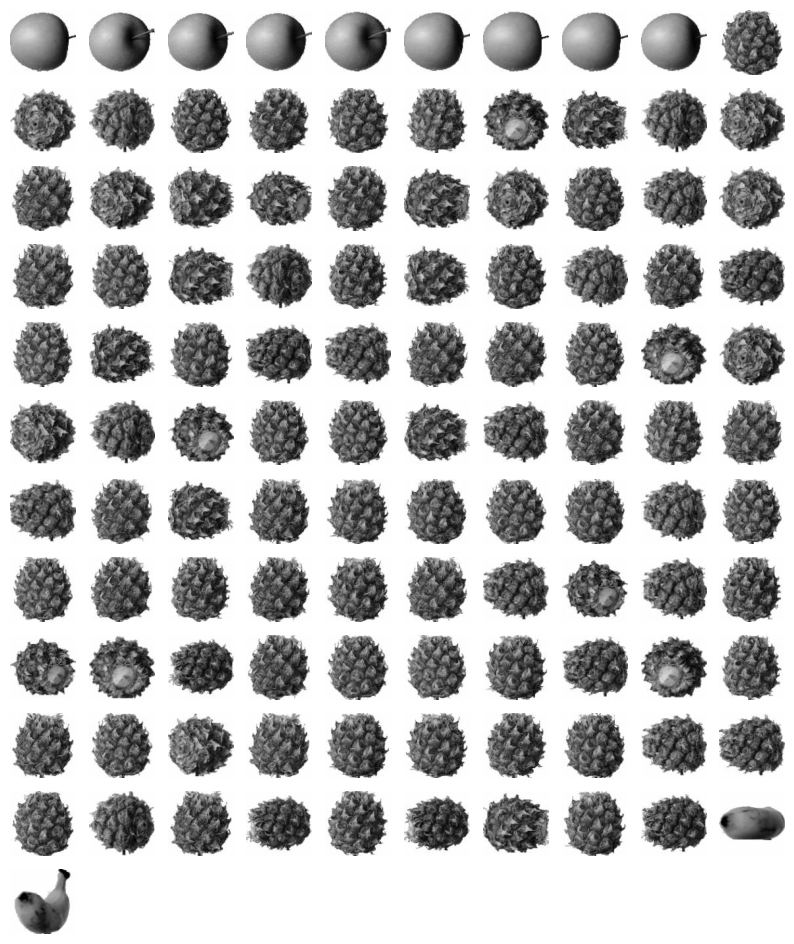

In [24]:
draw_fruits(fruits[km.labels_ == 0])

### 클러스터 중심

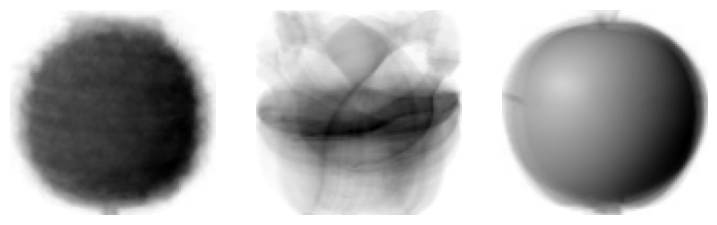

In [23]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [25]:
# 100번째의 클러스터 중심 찾기
km.transform(fruits_2d[100:101])

array([[3374.06980304, 8823.8971254 , 5252.22899617]])

In [26]:
# 100번째의 예측 군집값
km.predict(fruits_2d[100:101])

array([0], dtype=int32)

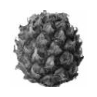

In [27]:
draw_fruits(fruits[100:101])

In [28]:
# 현 k-Means의 반복횟수
km.n_iter_

4

---
### 최적의 K값 찾기

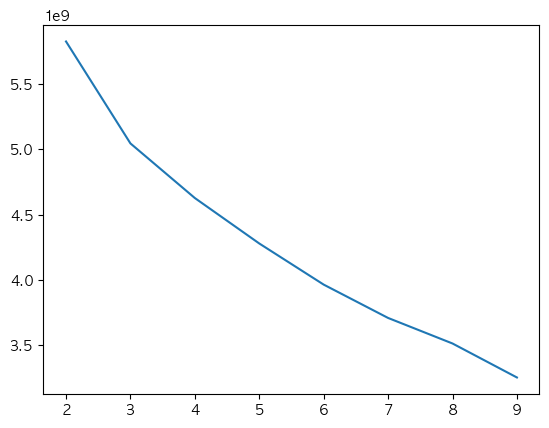

In [30]:
scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    scores.append(km.inertia_)

plt.plot(range(2,10), scores)
plt.show()

Elbow Method : Cluster간의 거리의 합을 나타내는 inertia(관성)가 급격히 떨어지는 구간이 생기는데</br>
이 지점의 k값을 군집의 개수로 사용